In [1]:
from ImportAll import *
from Functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Chaper 10. Stochastics

# 1.随机数

In [2]:
import numpy.random as npr

In [3]:
a=5
b=10
npr.rand(5,5)*(b-a)+a  #npr.rand()return ndarray random numbers from open interval [0,1)

array([[5.90736597, 8.58354749, 6.26346864, 9.01110383, 8.40434139],
       [9.04462036, 6.34982487, 9.31023571, 9.20028449, 6.95127783],
       [8.14385322, 8.01474249, 9.87229093, 6.6846678 , 8.68927419],
       [6.41059866, 7.67579577, 6.54273266, 7.12916011, 6.8867448 ],
       [5.56754689, 6.13946294, 9.17884115, 7.49679914, 8.96124561]])

In [4]:
#产生简单随机数的不同方式
sample_size=500
rn1=npr.rand(sample_size,3) #Random values in a given shape.
rn2=npr.randint(0,10,sample_size) #Return random integers from `low` (inclusive) to `high` (exclusive).
rn3=npr.random_sample(size=sample_size) #Return random floats in the half-open interval [0.0, 1.0).
a=[0,25,50,75,100]
rn4=npr.choice(a,size=sample_size) #Generates a random sample from a given 1-D array

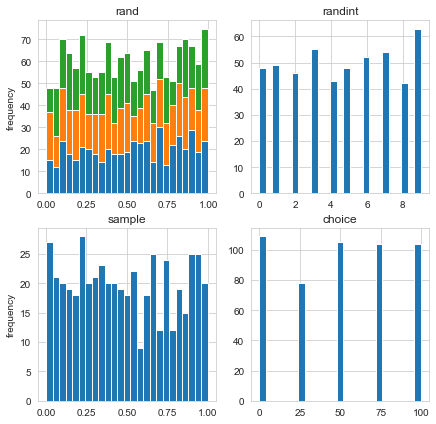

In [5]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(7,7))

ax1.hist(rn1,bins=25,stacked=True) #3列数据，分为25个柱子，叠加
ax1.set_title('rand')
ax1.set_ylabel('frequency')
ax1.grid(True)

ax2.hist(rn2,bins=25) #1列数据，分为25个柱子（没有25个，就有多少显示多少）
ax2.set_title('randint')
ax2.grid(True)

ax3.hist(rn3,bins=25)
ax3.set_title('sample')
ax3.set_ylabel('frequency')
ax3.grid(True)

ax4.hist(rn4,bins=25)
ax4.set_title('choice')
ax4.grid(True)

#align_figures()

In [6]:
#不同分布的随机数
sample_size=500
rn1=npr.standard_normal(sample_size) #Standard normal with mean of 0 and standard deviation of 1
rn2=npr.normal(100,20,sample_size) #Normal with mean of 100 and standard deviation of 20
rn3=npr.chisquare(df=0.5,size=sample_size) #Chi square with 0.5 degrees of freedom
rn4=npr.poisson(lam=1.0,size=sample_size) #Poisson with lambda of 1

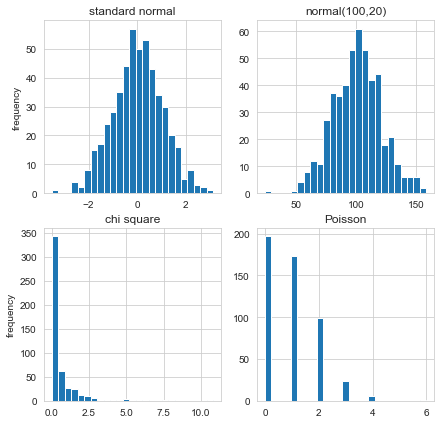

In [7]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(7,7))

ax1.hist(rn1,bins=25)
ax1.set_title('standard normal')
ax1.set_ylabel('frequency')
ax1.grid(True)

ax2.hist(rn2,bins=25)
ax2.set_title('normal(100,20)')
ax2.grid(True)

ax3.hist(rn3,bins=25)
ax3.set_title('chi square')
ax3.set_ylabel('frequency')
ax3.grid(True)

ax4.hist(rn4,bins=25)
ax4.set_title('Poisson')
ax4.grid(True)

#align_figures()

# 2.蒙特卡罗模拟

## 2.1 Black-Scholes-Merton期权定价

In [8]:
#未来股价ST=S0*exp((r − 1/2*σ^2)*T +σ*sqrt(T)*z)
S0=100 #0时刻股价
r=0.05 #无风险利率
sigma=0.25 #标准差
T=2.0 #时间-年
I=10000 #number of random draws

ST1=S0*np.exp((r-0.5*sigma**2)*T+sigma*np.sqrt(T)*npr.standard_normal(I)) #ST1是一万个随机数，服从右偏的正态分布

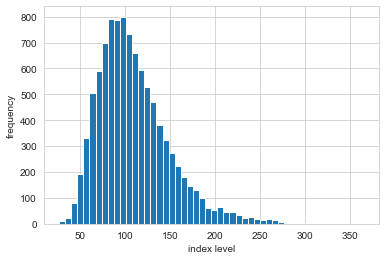

In [9]:
plt.hist(ST1,bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

#align_figures()

In [10]:
ST2=S0*npr.lognormal((r-0.5*sigma**2)*T,sigma*np.sqrt(T),size=I)

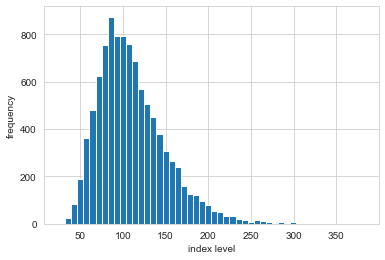

In [11]:
plt.hist(ST2,bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

#align_figures()

In [12]:
import scipy.stats as scs

In [13]:
scs.describe(ST1)

DescribeResult(nobs=10000, minmax=(26.710681913712193, 365.0350359457894), mean=109.97334389496442, variance=1642.829561347746, skewness=1.196579739475314, kurtosis=2.3630100050406107)

In [14]:
def print_statistics(a1,a2):
    '''Prints selected statistics.
    
    Parameters
    ==========
    a1,a2:ndarray objects
        results object from simulation
    '''
    sta1=scs.describe(a1)
    sta2=scs.describe(a2)
    print("%14s %14s %14s"%\
         ('statistic','data set 1','data set 2'))
    print(45*"-")
    print("%14s %14.3f %14.3f"%('size',sta1[0],sta2[0]))
    print("%14s %14.3f %14.3f"%('min',sta1[1][0],sta2[1][0]))
    print("%14s %14.3f %14.3f"%('max',sta1[1][1],sta2[1][1]))
    print("%14s %14.3f %14.3f"%('mean',sta1[2],sta2[2]))
    print("%14s %14.3f %14.3f"%('std',np.sqrt(sta1[3]),np.sqrt(sta2[3])))
    print("%14s %14.3f %14.3f"%('skew',sta1[4],sta2[4]))
    print("%14s %14.3f %14.3f"%('kurtosis',sta1[5],sta2[5]))

In [15]:
print_statistics(ST1,ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         26.711         25.203
           max        365.035        381.752
          mean        109.973        110.594
           std         40.532         40.363
          skew          1.197          1.152
      kurtosis          2.363          2.348


## 2.2 随机过程Stochastic Processes

### BSM模型中的几何布朗运动(Geometric Brownian motion)偏微分方程(stochastic differential equation, SDE)
### S(t) =S(t−Δt)*exp(( r −1/2*σ^2)*Δt+σ*sqrt(Δt)*zt

In [16]:
I=10000
M=50
dt=T/M
S=np.zeros((M+1,I))
S[0]=S0
for t in range(1,M+1):
    S[t]=S[t-1]*np.exp((r-0.5*sigma**2)*dt
                      +sigma*np.sqrt(dt)*npr.standard_normal(I))
#S为横跨50个期间的10000条随机路径

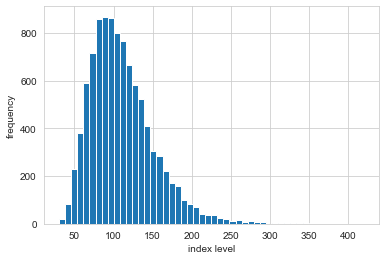

In [17]:
#将最终时刻的10000个ST绘制频率直方图
plt.hist(S[-1],bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid=True

#align_figures()

In [18]:
print_statistics(S[-1],ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         30.402         25.203
           max        419.172        381.752
          mean        110.645        110.594
           std         40.848         40.363
          skew          1.174          1.152
      kurtosis          2.636          2.348


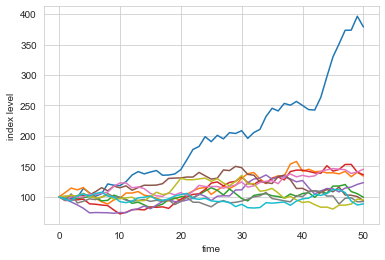

In [19]:
#first 10 simulated paths
plt.plot(S[:,:10],lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid=True

#align_figures()

### 2.3中值回归mean_reverting processes
### square-root diffusion dXt =κ*(θ−Xt)*dt +σ*sqrt(Xt)*dZt

In [20]:
#option起始价值0.05，长期均值0.02
x0=0.05
kappa=3.0 #mean-reversion factor
theta=0.02 #long-term mean of the process
sigma=0.1 #constant volatility parameter

In [21]:
I=10000
M=50
dt=T/M
def srd_euler():
    xh=np.zeros((M+1,I))
    x1=np.zeros_like(xh) #构造一个和xh维度一样的0矩阵
    xh[0]=x0
    x1[0]=x0
    for t in range(1,M+1):
        xh[t]=(xh[t-1]
              +kappa*(theta-np.maximum(xh[t-1],0))*dt  #option value不小于0
              +sigma*np.sqrt(np.maximum(xh[t-1],0))*np.sqrt(dt)
              *npr.standard_normal(I))
    x1=np.maximum(xh,0)
    return x1
x1=srd_euler()

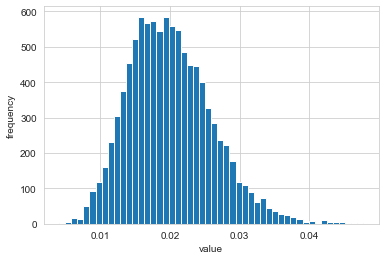

In [22]:
plt.hist(x1[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid=True

#align_figures()

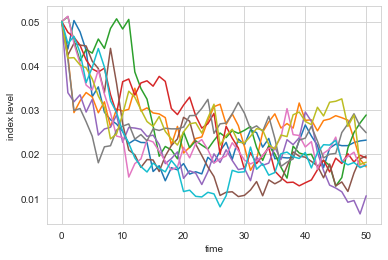

In [23]:
plt.plot(x1[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid=True

#align_figures()

### Exact discretization for square-root diffusion 没搞明白是啥

In [24]:
def srd_exact():
    x2=np.zeros((M+1,I))
    x2[0]=x0
    for t in range(1,M+1):
        df=4*theta*kappa/sigma**2
        c=(sigma**2*(1-np.exp(-kappa*dt)))/(4*kappa)
        nc=np.exp(-kappa*dt)/c*x2[t-1]
        x2[t]=c*npr.noncentral_chisquare(df,nc,size=I)
    return x2
x2=srd_exact()

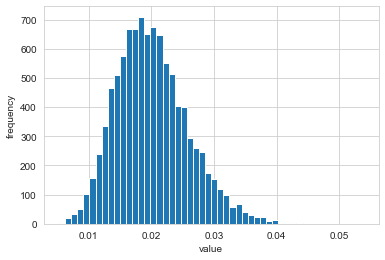

In [25]:
plt.hist(x2[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid=True

#align_figures()

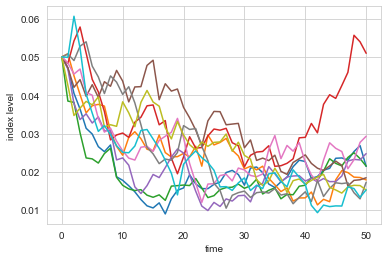

In [26]:
plt.plot(x2[:,:10],lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid=True

#align_figures()

In [27]:
print_statistics(x1[-1],x2[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min          0.004          0.005
           max          0.048          0.054
          mean          0.020          0.020
           std          0.006          0.006
          skew          0.553          0.587
      kurtosis          0.449          0.573


### 2.4随机方差
#### leverage effect: volatility goes up in times of stress (declining markets) and goes down in times of a bull market (risint markets)

In [28]:
S0=100.
r=0.05
v0=0.1
kappa=3.0
theta=0.25
sigma=0.1
rho=0.6
T=1.0

In [29]:
corr_mat=np.zeros((2,2))
corr_mat[0,:]=[1.0,rho]
corr_mat[1,:]=[rho,1.0]
cho_mat=np.linalg.cholesky(corr_mat)

cho_mat

array([[1. , 0. ],
       [0.6, 0.8]])

In [30]:
M=50
I=10000
ran_num=npr.standard_normal((2,M+1,I))

In [31]:
dt=T/M
v=np.zeros_like(ran_num[0])
vh=np.zeros_like(v)
v[0]=v0
vh[0]=v0
for t in range(1,M+1):
    ran=np.dot(cho_mat,ran_num[:,t,:])
    vh[t]=(vh[t-1]+kappa*(theta-np.maximum(vh[t-1],0))*dt
          +sigma*np.sqrt(np.maximum(vh[t-1],0))*np.sqrt(dt)
          *ran[1])
v=np.maximum(vh,0)

In [32]:
S=np.zeros_like(ran_num[0])
S[0]=S0
for t in range(1,M+1):
    ran=np.dot(cho_mat,ran_num[:,t,:])  #矩阵乘积
    S[t]=S[t-1]*np.exp((r-0.5*v[t])*dt+
                      np.sqrt(v[t])*ran[0]*np.sqrt(dt))

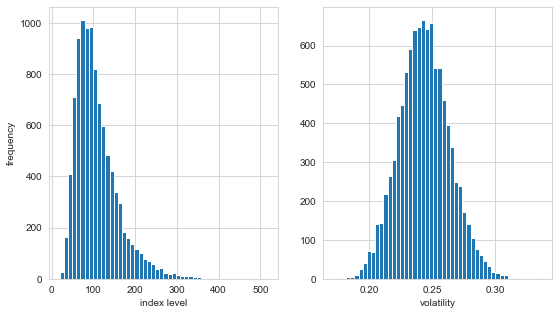

In [33]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(9,5))

ax1.hist(S[-1],bins=50)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.grid=True

ax2.hist(v[-1],bins=50)
ax2.set_xlabel('volatility')
ax2.grid=True

#align_figures()

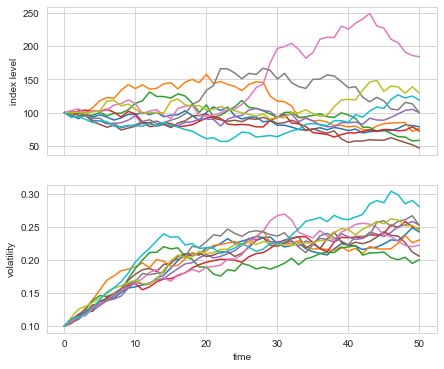

In [34]:
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True,figsize=(7,6))

ax1.plot(S[:,:10],lw=1.5)
ax1.set_ylabel('index level')
ax1.grid=True

ax2.plot(v[:,:10],lw=1.5)
ax2.set_xlabel('time')
ax2.set_ylabel('volatility')
ax2.grid=True

#align_figures()

In [35]:
print_statistics(S[-1],v[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         19.492          0.172
           max        516.352          0.336
          mean        108.125          0.243
           std         52.044          0.020
          skew          1.560          0.151
      kurtosis          4.085          0.055


### 2.5当股票对数收益服从Merton Jump Diffusion模型 时，模拟股票价格的样本路径
### dSt = (R – Rj)*St*dt + 𝜎*St*dZt + Jt*St*dNt

In [36]:
S0=100.
r=0.05
sigma=0.2
lamb=0.75
mu=-0.6
delta=0.25
T=1.0

In [37]:
#generate 3 sets of independent random numbers
M=50
I=10000
dt=T/M
rj=lamb*(np.exp(mu+0.5*delta**2)-1)
S=np.zeros((M+1,I))
S[0]=S0
sn1=npr.standard_normal((M+1,I))
sn2=npr.standard_normal((M+1,I))
poi=npr.poisson(lamb*dt,(M+1,I))
for t in range(1,M+1,1):
    S[t]=S[t-1]*(np.exp((r-rj-0.5*sigma**2)*dt
                       +sigma*np.sqrt(dt)*sn1[t])
                +(np.exp(mu+delta*sn2[t])-1)
                *poi[t])
    S[t]=np.maximum(S[t],0)

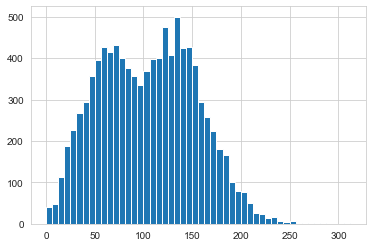

In [38]:
#since assumed a highly negative mean,it's right-skewed
plt.hist(S[-1],bins=50)
plt.xlabel='value'
plt.ylabel='frequency'
plt.grid='True'

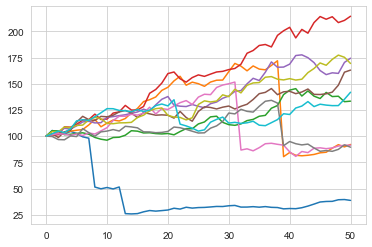

In [39]:
#highly negative jumps can also be found in first 10 paths
plt.plot(S[:,:10],lw=1.5)
plt.xlabel='time'
plt.ylabel='index level'
plt.grid=True

# 3.波动平滑 Variance Reduction Techniques

In [40]:
def gen_sn(M,I,anti_paths=True,mo_match=True):
    '''Function to generate random numbers for simulation.
    
    Parameters
    ==========
    M: int
        number of time invervals for discretization
    I: int
        number of paths to be simulated
    anti_paths: Boolean
        use of antithetic variates
    mo_math: Boolean
        use of moment matching
    '''
    if anti_paths is True:
        #均值为0
        I2=int(I/2) #'float' object cannot be interpreted as an integer
        sn=npr.standard_normal((M+1,I2)) #生成M+1组正态分布随机数，每组I2个
        sn=np.concatenate((sn,-sn),axis=1)
    else:
        sn=npr.standard_normal((M+1,I))
    if mo_match is True:
        #方差为1
        sn=(sn-sn.mean())/sn.std()
    return sn

# 4.估值 Valuation

## 4.1 European Options

In [41]:
S0=100.
r=0.05
sigma=0.25
T=1.0
I=50000
def gbm_mcs_stat(K):
    '''Valuation of European call option in Black-Scholes-Merton
    by Monte Carlo simulation (of index level at maturity)
    
    Parameters
    ==========
    K:float
        (positive) strike price of the option
        
    Returns
    =======
    C0:float
        estimated present value of European call option
    '''
    sn=gen_sn(1,I)
    #simulate index level at maturity
    ST=S0*np.exp((r-0.5*sigma**2)*T
                +sigma*np.sqrt(T)*sn[1])
    #calculate payoff at maturity
    hT=np.maximum(ST-K,0)
    #calculate MCS estimator
    C0=np.exp(-r*T)*1/I*np.sum(hT)
    return C0

In [42]:
gbm_mcs_stat(K=105.)

10.032383908869855

In [43]:
M=50
def gbm_mcs_dyna(K,option='call'):
    '''Valuation of European options in Black-Scholes-Merton
    by Monte Carlo simulation (of index level paths)
    
    Parameters
    ==========
    K:float
        (positive) strike price of the option
    option:string
        type of the option to be valued ('call','put')
    
    Returns
    =======
    C0:float
        estimated present value of European call option
    '''
    dt=T/M
    #simulation of index level paths
    S=np.zeros((M+1,I))
    S[0]=S0
    sn=gen_sn(M,I)
    for t in range(1,M+1):
        S[t]=S[t-1]*np.exp((r-0.5*sigma**2)*dt
                          +sigma*np.sqrt(dt)*sn[t])
    #case-based calculation of payoff
    if option=='call':
        hT=np.maximum(S[-1]-K,0)
    else:
        hT=np.maximum(K-S[-1],0)
    #calculation of MCS estimator
    C0=np.exp(-r*T)*1/I*np.sum(hT)
    return C0

In [44]:
gbm_mcs_dyna(K=110.,option='call')

7.813133420873675

In [45]:
gbm_mcs_dyna(K=110.,option='put')

12.682677879397383

In [46]:
'''无法引入bsm_functions module
from bsm_functions import bsm_call_value
'''

'无法引入bsm_functions module\nfrom bsm_functions import bsm_call_value\n'

In [47]:
#换scipy用BSM模型计算
from math import log, sqrt, exp
from scipy import stats
def bsm_call_value(S0,K,T,r,sigma):
    #S0=float(S0)
    d1=(log(S0/K)+(r+0.5*sigma**2)*T)/(sigma*sqrt(T))
    d2=(log(S0/K)+(r-0.5*sigma**2)*T)/(sigma*sqrt(T))
    C0=(S0*stats.norm.cdf(d1,0.0,1.0)-K*exp(-r*T)*stats.norm.cdf(d2,0.0,1.0))
    return C0

In [48]:
bsm_call_value(S0=S0,K=110,T=T,r=r,sigma=sigma)

8.026384693853352

###### The question is how well these simulation-based valuation approaches perform relative to the benchmark value from the Black-Scholes-Merton valuation formula.

In [49]:
stat_res=[]
dyna_res=[]
anal_res=[]
k_list=np.arange(80.,120.1,5.)
np.random.seed(200000)
for K in k_list:
    stat_res.append(gbm_mcs_stat(K))
    dyna_res.append(gbm_mcs_dyna(K))
    anal_res.append(bsm_call_value(S0,K,T,r,sigma))
stat_res=np.array(stat_res)
dyna_res=np.array(dyna_res)
anal_res=np.array(anal_res)

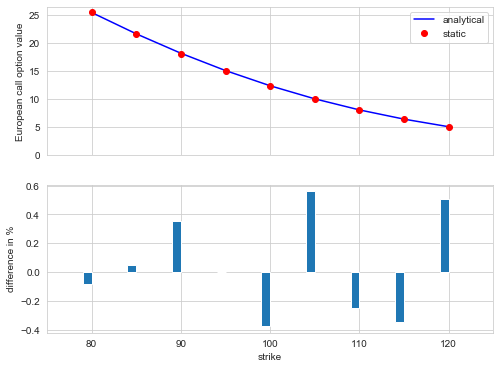

In [57]:
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True,figsize=(8,6))
ax1.plot(k_list,anal_res,'b',label='analytical')
ax1.plot(k_list,stat_res,'ro',label='static')
ax1.set_ylabel('European call option value')
ax1.grid=True
ax1.legend(loc=0)
ax1.set_ylim(ymin=0)
wi=1.0
ax2.bar(k_list-wi/2,(anal_res-stat_res)/anal_res*100,wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('difference in %')
ax2.set_xlim(left=75,right=125)
ax2.grid=True

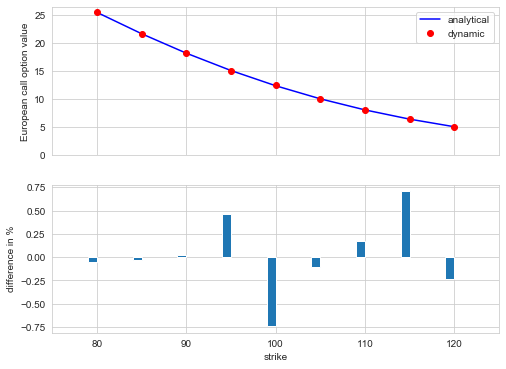

In [59]:
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True,figsize=(8,6))
ax1.plot(k_list,anal_res,'b',label='analytical')
ax1.plot(k_list,dyna_res,'ro',label='dynamic')
ax1.set_ylabel('European call option value')
ax1.grid=True
ax1.legend(loc=0)
ax1.set_ylim(ymin=0)
wi=1.0
ax2.bar(k_list-wi/2,(anal_res-dyna_res)/anal_res*100,wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('difference in %')
ax2.set_xlim(left=75,right=125)
ax2.grid=True

## 4.2 American Options
##### optimal stopping problem;
##### Bermudan exercise(A Bermuda option is a type of exotic options contract that can only be exercised on predetermined dates, often on one day each month. Bermuda options allow investors to buy or sell a security or underlying asset at a preset price on specific dates as well as the option's expiration date.);
##### Least-Squares Monte Carlo(LSM)
##### continuation value

In [63]:
def gbm_mcs_amer(K,option='call'):
    '''Valuation of American option in Black-Scholes-Merton
    by Monte Carlo simulation by LSM algorithm
    
    Parameters
    ==========
    K:float
        (positive) strike price of the option
    option:string
        type of the option to be valued('call','put')
        
    Returns
    =======
    C0:float
        estimated present value of European call option
    '''
    dt=T/M
    df=np.exp(-r*dt)
    #simulation of index levels
    S=np.zeros((M+1,I))
    S[0]=S0
    sn=gen_sn(M,I)
    for t in range(1,M+1):
        S[t]=S[t-1]*np.exp((r-0.5*sigma**2)*dt
                          +sigma*np.sqrt(dt)*sn[t])
    #case-based calculation of payoff
    if option=='call':
        h=np.maximum(S-K,0)
    else:
        h=np.maximum(K-S,0)
    #LSM algorithm
    V=np.copy(h)
    for t in range(M-1,0,-1):
        reg=np.polyfit(S[t],V[t+1]*df,7)
        C=np.polyval(reg,S[t])
        V[t]=np.where(C>h[t],V[t+1]*df,h[t])
    #MCS estimator
    C0=df*1/I*np.sum(V[1])
    return C0

In [64]:
gbm_mcs_amer(110.,option='call')

7.821371055396588

In [65]:
gbm_mcs_amer(110.,option='put')

13.624120764368236

In [67]:
#early excercise premium between European and American options
euro_res=[]
amer_res=[]
k_list=np.arange(80.,120.1,5.)
for K in k_list:
    euro_res.append(gbm_mcs_dyna(K,'put'))
    amer_res.append(gbm_mcs_amer(K,'put'))
euro_res=np.array(euro_res)
amer_res=np.array(amer_res)

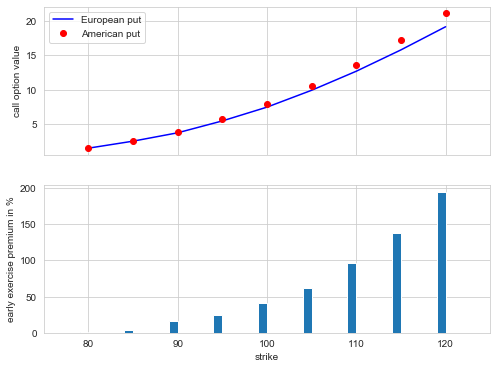

In [68]:
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True,figsize=(8,6))
ax1.plot(k_list,euro_res,'b',label='European put')
ax1.plot(k_list,amer_res,'ro',label='American put')
ax1.set_ylabel('call option value')
ax1.grid(True)
ax1.legend(loc=0)
wi=1.0
ax2.bar(k_list-wi/2,(amer_res-euro_res)*100,wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('early exercise premium in %')
ax2.set_xlim(left=75,right=125)
ax2.grid(True)

# 5. Risk Measures

## 5.1 VaR

In [69]:
S0=100
r=0.05
sigma=0.25
T=30/365.
I=10000
ST=S0*np.exp((r-0.5*sigma**2)*T
            +sigma*np.sqrt(T)*npr.standard_normal(I))

In [70]:
#geometric Brownian motion
R_gbm=np.sort(ST-S0)

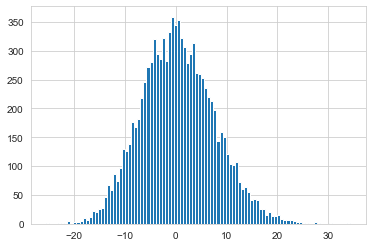

In [74]:
plt.hist(R_gbm,bins=S0)
plt.xlabel='absolute return'
plt.ylabel='frequency'
plt.grid=True

In [84]:
#scoreatpercentile
percs=[0.01,0.1,1.,2.5,5.0,10.0]
var=scs.scoreatpercentile(R_gbm,percs)
print("%16s %16s" % ('Confidence Level','Value-at-Risk'))
print(33*"-")
for pair in zip(percs,var):
    print("%16.2f %16.3f"%(100-pair[0],-pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           22.880
           99.90           19.778
           99.00           14.994
           97.50           12.979
           95.00           10.974
           90.00            8.626


In [91]:
#jump diffusion
dt=30./365/M
rj=lamb*(np.exp(mu+0.5*delta**2)-1)
S=np.zeros((M+1,I))
S[0]=S0
sn1=npr.standard_normal((M+1,I))
sn2=npr.standard_normal((M+1,I))
poi=npr.poisson(lamb*dt,(M+1,I))
for t in range(1,M+1,1):
    S[t]=S[t-1]*(np.exp((r-rj-0.5*sigma**2)*dt
                       +sigma*np.sqrt(dt)*sn1[t])
                +(np.exp(mu+delta*sn2[t])-1)
                *poi[t])
    S[t]=np.maximum(S[t],0)

In [87]:
R_jd=np.sort(S[-1]-S0)

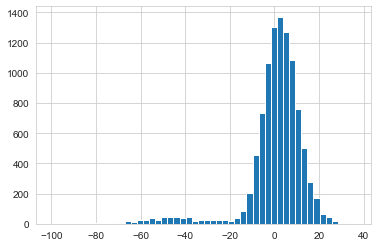

In [90]:
plt.hist(R_jd,bins=50)
plt.xlabel='absolute return'
plt.ylabel='frequency'
plt.grid=True

In [92]:
#left fat tail
percs=[0.01,0.1,1.,2.5,5.0,10.0]
var=scs.scoreatpercentile(R_jd,percs)
print("%16s %16s"%('Confidence Level','Value-at-Risk'))
print(33*"-")
for pair in zip(percs,var):
    print("%16.2f %16.3f"%(100-pair[0],-pair[1]))

Confidence Level    Value-at-Risk
---------------------------------
           99.99           84.830
           99.90           71.583
           99.00           56.468
           97.50           45.943
           95.00           24.110
           90.00            8.892


In [93]:
#compare 2 methods
percs=list(np.arange(0.0,10.1,0.1))
gbm_var=scs.scoreatpercentile(R_gbm,percs)
jd_var=scs.scoreatpercentile(R_jd,percs)

(-104.47205574230297, 0.0)

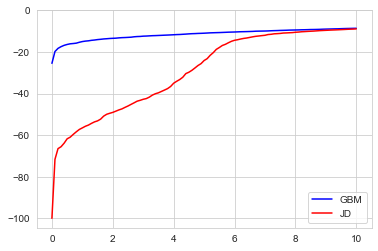

In [94]:
plt.plot(percs,gbm_var,'b',lw=1.5,label='GBM')
plt.plot(percs,jd_var,'r',lw=1.5,label='JD')
plt.legend(loc=4)
plt.xlabel='100-confidence leve[%]'
plt.ylabel='value-at-risk'
plt.grid=True
plt.ylim(ymax=0.0)

## 5.2 CVaR(Credit VaR)
#### CVA(credit value adjustment)
#### 2 assumptions: probability of default, p; loss level, L.

In [95]:
#BSM model
S0=100.
r=0.05
sigma=0.2
T=1.
I=100000
ST=S0*np.exp((r-0.5*sigma**2)*T
            +sigma*np.sqrt(T)*npr.standard_normal(I))

In [99]:
L=0.5 #fixed average loss level
p=0.01 #fixed probability of default per year of counterparty

In [100]:
#default scenarios, Poisson distribution, assume a default can only occur once
D=npr.poisson(p*T,I)
D=np.where(D>1,1,D)

In [102]:
#value without default
np.exp(-r*T)*1/I*np.sum(ST)

99.98686481478978

In [103]:
CVaR=np.exp(-r*T)*1/I*np.sum(L*D*ST)
CVaR

0.48842821998507907

In [107]:
#value adjusted for credit risk
S0_CVA=np.exp(-r*T)*1/I*np.sum((1-L*D)*ST)
S0_CVA

99.49843659480472

In [108]:
S0_adj=S0-CVaR
S0_adj

99.51157178001492

In [109]:
#number of losses
np.count_nonzero(L*D*ST)

971

(0.0, 175)

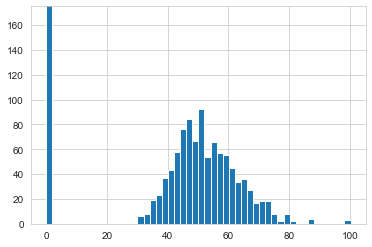

In [111]:
#违约损失分布
plt.hist(L*D*ST,bins=50)
plt.xlabel='loss'
plt.ylabel='frequency'
plt.grid=True
plt.ylim(ymax=175)

In [112]:
#European call option
K=100.
hT=np.maximum(ST-K,0)
C0=np.exp(-r*T)*1/I*np.sum(hT)
C0

10.436107662895779

In [113]:
CVaR=np.exp(-r*T)*1/I*np.sum(L*D*hT)
CVaR

0.05238309106952958

In [114]:
C0_CVA=np.exp(-r*T)*1/I*np.sum((1-L*D)*hT)
C0_CVA

10.383724571826253

In [115]:
#number of losses
np.count_nonzero(L*D*hT) 

554

In [116]:
#number of defaults
np.count_nonzero(D)

971

In [117]:
#zero payoff
I-np.count_nonzero(hT)

44024

(0.0, 350)

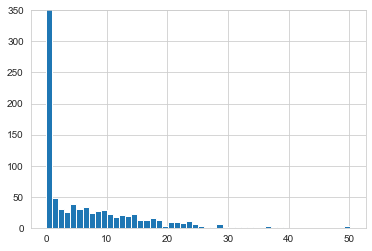

In [118]:
plt.hist(L*D*hT,bins=50)
plt.xlabel='loss'
plt.ylabel='frequency'
plt.grid=True
plt.ylim(ymax=350)